# Recurent Neural Networks. 
## Natural Learning Process. Sentiment Analysis. Char Generation.
### Tyamin Ilya (tg: @mrshrimp_it)

Этот модуль посвящен неройнным сетям, занимающимся обработкой текстовой информации.

**Sentiment Analysis** - обработка текстовой информации, например, отзывов о кинофильме и дальнейшее предсказание положителен ли отзыв или нет.

**Char Generation** - продолжение текстовой информации по уже имеющейся

## Ways to encode the information

### Bag of Words

Все слова представляют собой словарь. Каждое из слов кодируется цифрой. Кроме того отслеживается частота их появления. 

*Минус*: не отслеживаем порядок, но отслеживаем частоту. - теряется иногда смысл предложений, так как 2 предложения составленные из одних и тех же слов могут иметь разный смысл. Можно реализовать обычным питоном через словарь.


In [1]:
vocab = {}  # словарь, где значение  - слово, индекс - его индекс
word_encoding = 1
def bag_of_words(text):
  global word_encoding
  words = text.lower().split(" ")  # режем строчку по пробелу, предварительно применив нижний регистр ко всем словам
  bag = {}  # ЗАШИФРОВАННЫЙ цифрами словарь

  for word in words:
    if word in vocab:
      encoding = vocab[word]  # получим индекс
    else:
      vocab[word] = word_encoding
      encoding = word_encoding
      word_encoding += 1
    
    if encoding in bag:
      bag[encoding] += 1
    else:
      bag[encoding] = 1
  
  return bag

text = "Привет Привет Моя Моя Machine MaCHiNe LeaRNInG"
bag = bag_of_words(text)
print(bag, vocab)

{1: 2, 2: 2, 3: 2, 4: 1} {'привет': 1, 'моя': 2, 'machine': 3, 'learning': 4}


Способ плох, так как при перестановке слов их количество обычно одинаково, а смысл может быть разным:



In [2]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_bag = bag_of_words(positive_review)
neg_bag = bag_of_words(negative_review)

print("Positive:", pos_bag)
print("Negative:", neg_bag)
print("Is positive equals negative?", pos_bag == neg_bag)

Positive: {5: 1, 6: 1, 7: 1, 8: 1, 9: 2, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1}
Negative: {5: 1, 6: 1, 7: 1, 8: 1, 9: 2, 10: 1, 11: 1, 12: 1, 17: 1, 14: 1, 15: 1, 16: 1, 13: 1}
Is positive equals negative? True


### Word Embedings

К счастью, есть третий метод, который намного лучше — Word Embedings. Этот метод сохраняет порядок слов без изменений, а также кодирует похожие слова с очень похожими метками. Он пытается не только закодировать частоту и порядок слов, но и значение этих слов в предложении. Он кодирует каждое слово как вектор, который представляет его контекст в предложении.

В отличие от предыдущих методов, Word Embedings изучается путем просмотра множества различных обучающих примеров. Вы можете добавить так называемый слой встраивания в начало вашей модели, и пока ваша модель будет обучаться, ваш слой встраивания изучит правильные вложения для слов. Вы также можете использовать предварительно обученные слои внедрения.

## RNN's (recurrent neural network)

### Simple RNN layer

Ранее мы только рассматривали нейронные сети, где порядок обработки информации строго последовательный и слева направо. Основное отличие реккурентной нейронной сети - то, что наше предложение представляется в виде последовательности слов. Реккуретная нейронная сеть обрабатывает слово, ищет закономерность с предыдущим, понимает смысл сформировшегося предложения и идет дальше. Грубо говоря, внутри лежит цикл.

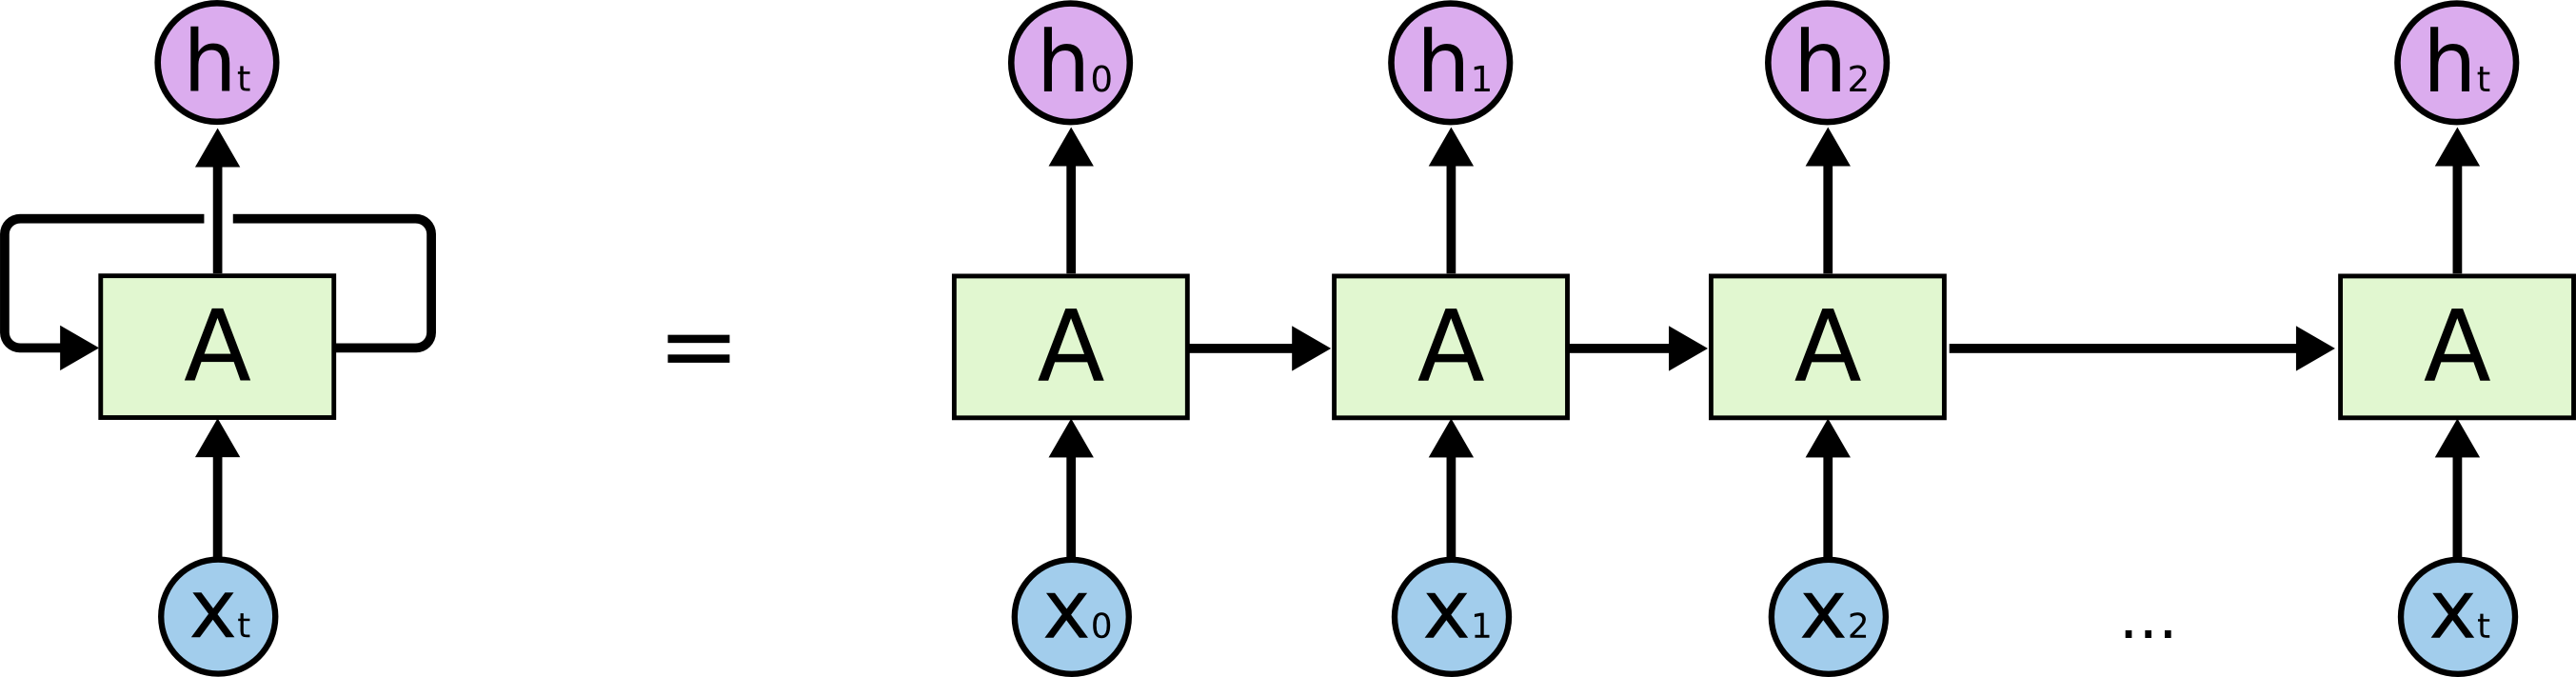

Слой, представленный на картинке и описанный выше называется простым реккурентным слоем **(simple RNN layer)** . Он может быть эффективен (в индивидуальном использовании) для совсем маленьких текстов. В иных случаях в сеть включают еще и другой слой.

Простой слой RNN = «Hi I am Tim» - сначала обрабатывается значение Hi, для него генерируется выход, потом для I - на основе обработанного раннее значения генерируется его выход и так далее - это называется простой слой RNN

### LSTM layer (Long Short-Term Memory)

В то время как в нашем простом слое RNN входные данные из предыдущих временных меток постепенно исчезали по мере того, как мы продвигались дальше по входным данным, с LSTM у нас есть структура данных долговременной памяти, в которой хранятся все ранее просмотренные входные данные, а также когда мы их видели. 

Это позволяет нам получить доступ к любому предыдущему значению, которое мы хотим, в любой момент времени. Это усложняет нашу сеть и позволяет обнаруживать более полезные взаимосвязи между входными данными и временем их появления.

## Sentiment Analysis

В качестве датасета возьмем датасет "reuters" из keras.

In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

VOCAB_SIZE = 88584

MAXLEN = 200
BATCH_SIZE = 64

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = VOCAB_SIZE)

17464789/17464789 [==============================] - 0s 0us/step


Посмотрим на любой.

In [4]:
display(train_data[1]) # Вывод: набор из цифр

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 10156,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 11596,
 349,
 2637,
 148,
 605,
 15358,
 8003,
 15,
 123,
 125,
 68,
 23141,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 36893,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 25249,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 46151,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 

### Data Preprocessing

Все тексты - разной длины. Нам необходимо их как-то обработать. Например, укоротить если количество слов > MAXLEN, или заполнить массив нулями, если < MAXLEN. К счастью, в импортированном sequence есть для этого специальная функция:

In [5]:
train_data = keras.utils.data_utils.pad_sequences(train_data, MAXLEN)
test_data = keras.utils.data_utils.pad_sequences(test_data, MAXLEN)

### Creating the model

Создадим модель из простого слоя, слоя RSTM, и связывающего (выходного) слоя с функцией активации - сигмоида (используется она так как позволяет сплющивать выход на [0,1]. >0.5 - True, <0.5 - False)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          2834688   
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 2,843,041
Trainable params: 2,843,041
Non-trainable params: 0
_________________________________________________________________


### Training and evaluating the model

Функция ошибки - binary_crossentropy, так как 2 выхода (+,-).

In [8]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['acc'])

history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 14s 12ms/step - loss: 0.4058 - acc: 0.8104 - val_loss: 0.3240 - val_acc: 0.8638
Epoch 2/10
625/625 [==============================] - 7s 11ms/step - loss: 0.1769 - acc: 0.9362 - val_loss: 0.3154 - val_acc: 0.8654
Epoch 3/10
625/625 [==============================] - 7s 12ms/step - loss: 0.0952 - acc: 0.9671 - val_loss: 0.3871 - val_acc: 0.8568
Epoch 4/10
625/625 [==============================] - 7s 11ms/step - loss: 0.0522 - acc: 0.9844 - val_loss: 0.4783 - val_acc: 0.8706
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 0.0365 - acc: 0.9894 - val_loss: 0.4712 - val_acc: 0.8562
Epoch 6/10
625/625 [==============================] - 7s 12ms/step - loss: 0.0397 - acc: 0.9880 - val_loss: 0.5442 - val_acc: 0.8536
Epoch 7/10
625/625 [==============================] - 7s 11ms/step - loss: 0.0306 - acc: 0.9893 - val_loss: 0.5429 - val_acc: 0.8628
Epoch 8/10
625/625 [==============================] - 7s 11ms/step -

In [9]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 4s 5ms/step - loss: 0.7508 - acc: 0.8318
[0.7508016228675842, 0.8318399786949158]


### Making predictions

Для начала закодируем наш текст, чтобы нейронная сеть смогла его понять. Затем с помозью predict() найдем значение. Раскодируем текст

In [10]:
word_index = imdb.get_word_index()

def encode_text(text):
  tokens = keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return keras.utils.data_utils.pad_sequences([tokens], MAXLEN)[0]

text = "the film is good"
encoded = encode_text(text)
print(encoded)


1641221/1641221 [==============================] - 0s 0us/step
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1 19  6 49]


Функция для раскодирования:

In [11]:
# Получим все буквы по индексам
reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_integers(integers):
    PAD = 0
    text = ""
    for num in integers:
      if num != PAD:
        text += reverse_word_index[num] + " "

    # Возвращаем обратную строчку
    return text[:-1]

Отдельная функция для предсказывания

In [12]:
def predict(text):
  # Закодируем текст
  encoded_text = encode_text(text)

  # numpy массив из 200 единиц
  pred = np.zeros((1,200))

  # представим как закодированный текст
  pred[0] = encoded_text

  # предскажем значение
  result = model.predict(pred) 
  
  print(result[0])

positive_review = "Hui Timofeya"
predict(positive_review)

negative_review = "so bad! it is so terrible and awful. I HATE IT"
predict(negative_review)

1/1 [==============================] - 0s 367ms/step
[0.45098588]
1/1 [==============================] - 0s 20ms/step
[0.37614802]


## RNN Play Generator (text generation)

### Theory and Import

Будем использовать реккурентный нейронные сети, чтобы продолжить фразы (в нашем случае пьесу "Ромео и Джульетта". Мы можем использовать модель много раз подряд с выводом последнего прогноза в качестве ввода для следующего вызова для создания последовательности.

In [13]:
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

### Dataset

In [14]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt') 

text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

1115394/1115394 [==============================] - 0s 0us/step


Посмотрим общее количество символов

In [15]:
print (f'Length of text: {len(text)} characters')

Length of text: 1115394 characters


### Encoding and decoding the text

С помощью set-а сделаем словарь из символов, закодируем их цифрами. 

Напишем отдельную функцию для кодирования текста в виде numpy-массива и отдельную для обратного декодирования

In [16]:
vocab = sorted(set(text))

print(f"Length of vocab: {len(vocab)}")

char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

def text_to_int(text):
  return np.array([char2idx[c] for c in text])

text_as_int = text_to_int(text)

print(text_as_int[:50])

Length of vocab: 65
[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56]


In [17]:
def int_to_text(ints):
  try:
    ints = ints.numpy()
  except:
    pass
  return ''.join(idx2char[ints])

print(int_to_text(text_as_int[:50]))

First Citizen:
Before we proceed any further, hear


### Creating Train Examples

Задача модели - по введеным данным предсказать следующий символ.

Это означает, что нам нужно разделить наши текстовые данные сверху на множество более коротких последовательностей, которые мы можем передать модели в качестве обучающих примеров.
Обучающие примеры, которые мы подготовим, будут использовать последовательность seq_length в качестве входных данных и последовательность seq_length в качестве выходных данных, где эта последовательность представляет собой исходную последовательность, сдвинутую на одну букву вправо.

Пример: Nam $⇒$ ame

In [18]:
# Пусть наши наборы состоят из 120 символов
seq_length = 120 

# Количество примером за эпоху
examples_per_epoch = len(text)//(seq_length+1)

# Создадим обучающие примеры в виде тензоров
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

Затем мы можем использовать пакетный метод, чтобы превратить этот поток символов в пакеты желаемой длины.

In [19]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

Разделим на обучающие и тренировочные

In [20]:
def split_input_target(text_str): 
    input_text = text_str[:-1]  # nam
    target_text = text_str[1:]  # ame
    return input_text, target_text  # nam, ame

dataset = sequences.map(split_input_target)  # применим функцию к каждому входу

Посмотрим на конкретном примере

In [21]:
for x, y in dataset.take(1):
  print(f"{'-'*5}EXAMPLE{'-'*5}")
  print(f"{'-'*5}INPUT{'-'*5}")
  print(int_to_text(x))
  print(f"\n{'-'*5}OUTPUT{'-'*5}")
  print(int_to_text(y))

-----EXAMPLE-----
-----INPUT-----
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved ra

-----OUTPUT-----
irst Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rat


Создадим обучающие пакеты

In [22]:
BATCH_SIZE = 72
VOCAB_SIZE = len(vocab)  # количество уникальных символов с словаре
EMBEDDING_DIM = 256 # размер слоя Embedding
RNN_UNITS = 1024 # размер слоя RSTM

data = dataset.shuffle(10000).batch(BATCH_SIZE, drop_remainder=True)

### Building the model

Построим модель. Мы будем использовать слой LSTM и один Dense слой, который даст нам распределение вероятностей по всем узлам.

In [23]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

model = build_model(VOCAB_SIZE,EMBEDDING_DIM, RNN_UNITS, BATCH_SIZE)

### Creating the loss function

Теперь мы создадим собственную функцию ошибки. Наша модель будет отдавать тензор формы (64, sequence_length, 65), который представляет распределение вероятности каждого символа на каждом временном шаге для каждой последовательности в пакете.

In [24]:
for input_example_batch, target_example_batch in data.take(1):
  example_batch_predictions = model(input_example_batch)  # ask our model for a prediction on our first batch of training data (64 entries)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")  # print out the output shape

(72, 120, 65) # (batch_size, sequence_length, vocab_size)


In [25]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

### Compiling the model

In [26]:
model.compile(optimizer='adam', loss=loss)

### Creating cheackpoints to saving and loading the model

Это позволит нам загружать модель с определенной точки обучения

In [27]:
checkpoint_dir = './training_checkpoints'  # название директории

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

### Training the model

In [28]:
history = model.fit(data, epochs=50, callbacks=[checkpoint_callback])

Epoch 1/50
128/128 [==============================] - 17s 108ms/step - loss: 2.7809
Epoch 2/50
128/128 [==============================] - 15s 107ms/step - loss: 2.0425
Epoch 3/50
128/128 [==============================] - 15s 107ms/step - loss: 1.7762
Epoch 4/50
128/128 [==============================] - 15s 107ms/step - loss: 1.6126
Epoch 5/50
128/128 [==============================] - 15s 106ms/step - loss: 1.5069
Epoch 6/50
128/128 [==============================] - 15s 107ms/step - loss: 1.4343
Epoch 7/50
128/128 [==============================] - 15s 107ms/step - loss: 1.3810
Epoch 8/50
128/128 [==============================] - 15s 107ms/step - loss: 1.3375
Epoch 9/50
128/128 [==============================] - 15s 108ms/step - loss: 1.3009
Epoch 10/50
128/128 [==============================] - 15s 107ms/step - loss: 1.2663
Epoch 11/50
128/128 [==============================] - 15s 106ms/step - loss: 1.2346
Epoch 12/50
128/128 [==============================] - 15s 107ms/step - lo

## Generating the text (predicting)

Код любезно предоставлен Tensorflow

In [32]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 800

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
    
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))